# Microéconomie 5
## TD1 : Répartition optimale des ressources

### Exercice 1 : Préférences Cobb-Douglas

Les dotations de l'économie sont $\omega_1 = 40$ et $\omega_2 = 30$. Les agents ont les préférences

\begin{aligned}
    U^A(x^A) &= (x_1^A)^\alpha(x_2^A)^\beta \\
    U^B(x^B) &= x_1^B \, x_2^B
\end{aligned}
    
où $\alpha, \beta > 0$ (dans les faits on utilise $\alpha = \frac{1}{4}$ et $\beta = \frac{3}{4}$). Le code suivant commence par définir ces données du problème.

**Dans le code ci-dessous, vous pouvez modifier librement les dotations $\omega_1$ et $\omega_2$ ainsi que les coefficients $\alpha$ et $\beta$ pour voir comment cela affecte les résultats.**

In [1]:
omega1 <- 40                                 # dotation totale en bien 1
omega2 <- 30                                 # dotation totale en bien 2
alpha <- 1/4                                 # importance relative du bien 1 pour A
beta <- 3/4                                  # importance relative du bien 2 pour A
UA <- function(x1, x2) x1^alpha * x2^beta    # fonction d'utilité de A
UB <- function(x1, x2) x1 * x2               # fonction d'utilité de B

Je définis aussi `x1`, une série de valeurs de $x_1$ qui va me servir à tracer les courbes.

In [2]:
x1 <- seq(0, omega1, length=1000)

Pour tracer la carte d'indifférence des agents, j'utilise les équations des courbes d'indifférence données par
\begin{aligned}
    U^A(x^A) = U_0 &\iff x_2^A = \left(\frac{U_0}{(x_1^A)^\alpha}\right)^\frac{1}{\beta} \\
    U^B(x^B) = U_0 &\iff x_2^B = \frac{U_0}{x_1^B}
\end{aligned}
pour définir deux fonctions `indiffA` et `indiffB` qui prennent en argument un niveau d'utilité `U` et qui renvoient les points de la courbe d'indifférence correspondant à ce niveau d'utilité.

In [3]:
indiffA <- function(U) (U/x1^alpha)^(1/beta)
indiffB <- function(U) U/x1

Je trace ensuite les courbes d'indifférence pour des niveaux d'utilité bien choisis : celles de $A$ en bleu et celles de $B$ en orange.

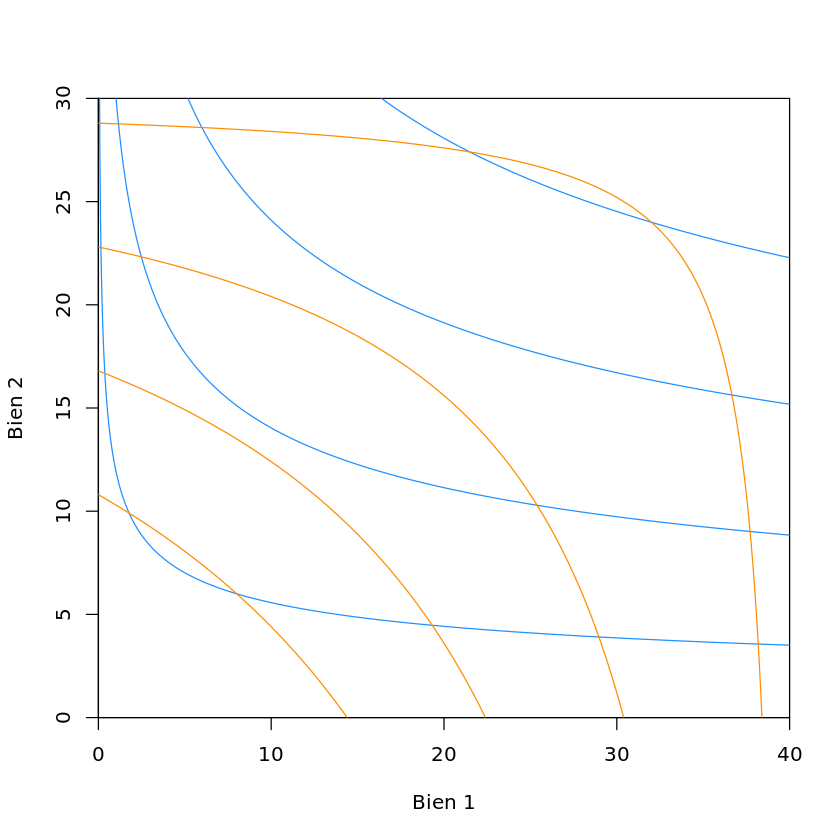

In [4]:
niveauxA <- seq(UA(omega1/5, omega2/5), UA(4*omega1/5, 4*omega2/5), len = 4)
niveauxB <- seq(UB(omega1/5, omega2/5), UB(4*omega1/5, 4*omega2/5), len = 4)

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", xlab = "Bien 1", ylab = "Bien 2", xaxs = "i", yaxs = "i")
for (U in niveauxA) lines(x1, indiffA(U), col = "dodgerblue", ylim = c(0, omega2))                # CI de A
for (U in niveauxB) lines(x1, rev(omega2 - indiffB(U)), col = "darkorange", ylim = c(0, omega2))  # CI de B

On remarque que les courbes d'indifférence sont toutes convexes : **les préférences sont donc convexes**.

On cherche ensuite la courbe des optima de Pareto : pour cela, il faut par exemple résoudre le programme

\begin{equation}
    \max_{x^A, x^B} \; U^A(x^A) \qquad
        \text{s.c.} \; \begin{cases}
        U^B(x^B) \geq \underline U^B \\
        x_1^A + x_1^B \leq \omega_1 \\
        x_2^A + x_2^B \leq \omega_2 \\
        x_i^k \geq 0 \; (\forall i \in \{1, 2\}, k \in \{A, B\}).
        \end{cases}
\end{equation}

Ignorons _a priori_ les contraintes de positivité des allocations. Le lagrangien associé à ce problème est alors

\begin{equation}
    \mathcal L (x^A, x^B, \lambda, \mu_1, \mu_2) = (x_1^A)^\alpha(x_2^A)^\beta + \lambda (x_1^B \, x_2^B - \underline U^B) + \mu_1 (\omega_1 - x_1^A - x_1^B) + \mu_2 (\omega_2 - x_2^A - x_2^B).
\end{equation}

On en déduit les conditions du premier ordre par rapport aux sept variables $x_1^A$, $x_2^A$, $x_1^B$, $x_2^B$, $\lambda$, $\mu_1$, et $\mu_2$,

\begin{aligned}
    &\alpha (x_1^A)^{\alpha-1} (x_2^A)^\beta - \mu_1 = 0 \\
    &\beta (x_1^A)^\alpha (x_2^A)^{\beta-1} - \mu_2 = 0 \\
    &\lambda x_2^B - \mu_1 = 0 \\
    &\lambda x_1^B - \mu_2 = 0 \\
    &U^B(x^B) = \underline U^B \\
    &x_1^A + x_1^B = \omega_1 \\
    &x_2^A + x_2^B = \omega_2.
\end{aligned}

Une combinaison adéquate de ces équations fournit

\begin{equation}
    \underbrace{\frac{\alpha}{\beta} \frac{x_2^A}{x_1^A}}_{= \mathsf{TMS}^A} = \frac{\mu_1}{\mu_2} = \underbrace{\frac{x_2^B}{x_1^B}}_{= \mathsf{TMS}^B} = \frac{\omega_2 - x_2^A}{\omega_1 - x_1^A}
\end{equation}

que l'on résout pour finalement obtenir les $x_2^A$ optimaux en fonction de $x_1^A$ :

\begin{equation}
    \boxed{ x_2^A = \frac{\beta x_1^A \omega_2}{\alpha \omega_1 + (\beta - \alpha) x_1^A} }
    \overset{\text{A.N.}}{=} \frac{45 x_1^A}{20 + x_1^A}.
\end{equation}

Pour tracer cette courbe des optima, je définis une fonction `optima` qui prend en argument une allocation en bien 1 `x` et renvoie l'allocation optimale en bien 2 correspondante, selon la formule trouvée ci-dessus.

In [ ]:
optima <- function(x) beta*x*omega2/(alpha*omega1 + (beta-alpha)*x)

Je trace maintenant la courbe des optima (en violet), ainsi que quelques courbes d'indifférence : on remarque que les optima de Pareto sont bien les points de tangence entre les courbes d'indifférence de $A$ et de $B$.

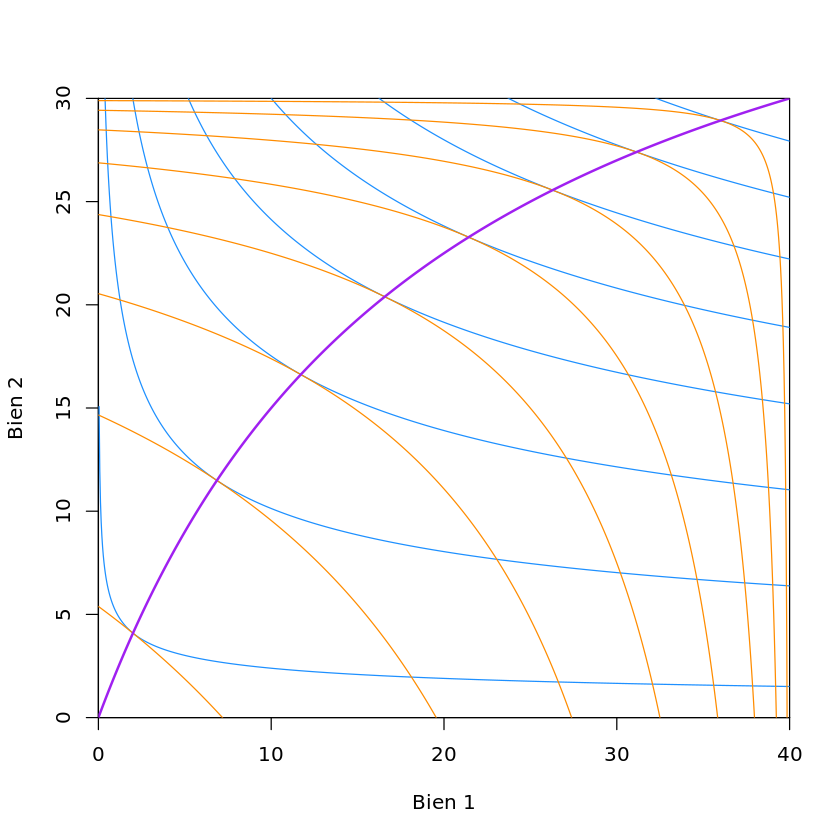

In [8]:
allocA1 <- seq(.05*omega1, .9*omega1, len=8)     # allocations de A en bien 1 pour les courbes d'indifférence

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
for (i in 1:length(allocA1)) {                   # courbes d'indifférence tangentes
    xA1 <- allocA1[i]
    xA2 <- optima(allocA1[i])
    lines(x1, indiffA(UA(xA1, xA2)), col = "dodgerblue", ylim = c(0, omega2))
    lines(x1, rev(omega2 - indiffB(UB(omega1 - xA1, omega2 - xA2))), col = "darkorange", ylim = c(0, omega2))
}
lines(x1, optima(x1), col = "purple", lwd = 2)   # courbe des optima

On s'intéresse enfin aux allocations acceptées dans la négociation. À partir d'une allocation initiale $I$, un agent _refuse_ une proposition d'allocation dans deux cas :

1. Si l'allocation proposée lui fournit moins d'utilité qu'il en a actuellement à $I$ (c'est-à-dire si elle se situe sous sa courbe d'indifférence passant par $I$) ;

2. Si il existe une autre allocation, différente de celle proposée, qui serait meilleure pour lui sans nuire à l'agent qui fait la proposition (c'est-à-dire si la proposition n'est pas une allocation optimale).

À partir de l'allocation initiale $I$, une allocation est donc acceptée par $A$ si et seulement si elle est optimale **et** se situe au-dessus de sa courbe d'indifférence passant par $I$.

Représentons dans un premier temps l'ensemble des allocations acceptées par $A$ (en pointillés bleus).

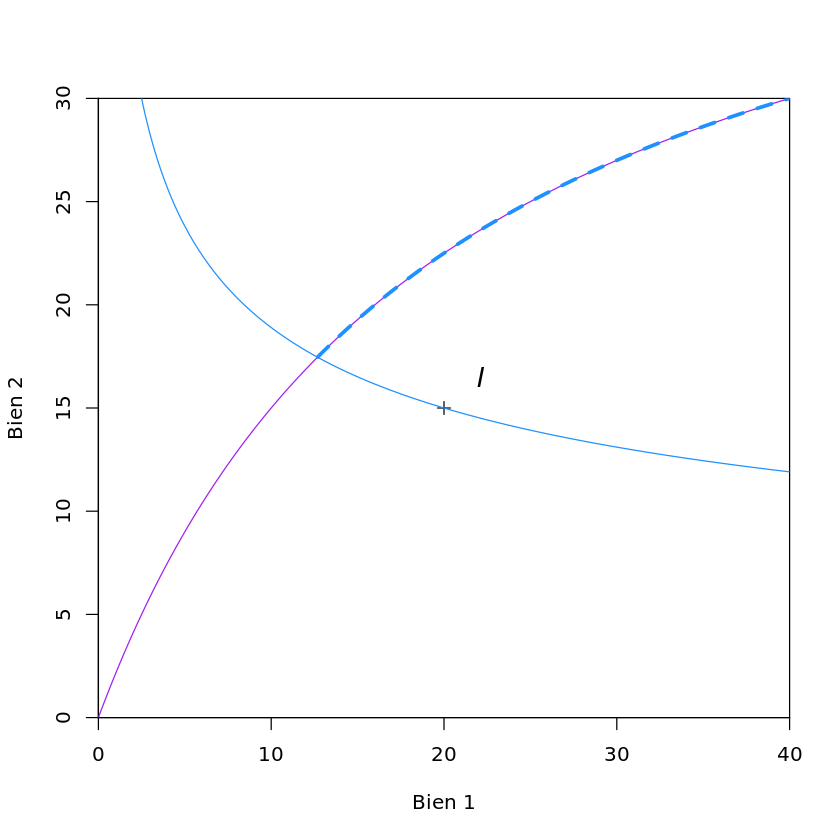

In [9]:
I <- c(20, 15)
XA <- x1[UA(x1, optima(x1)) > UA(I[1], I[2])]                                # allocations acceptées par A

# Allocations acceptées par A

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                  # point I
    text(I[1]+.05*omega1, I[2]+.05*omega2, labels = "I", cex = 1.3, font = 3)
lines(x1, optima(x1), col = "purple", lwd = 1)                               # courbe des optima
lines(x1, indiffA(UA(I[1], I[2])), col = "dodgerblue", ylim = c(0, omega2))  # courbe d'indifférence de A
lines(XA, optima(XA), col = "dodgerblue", lwd = 3, lty = 2)                  # allocations acceptées par A

De manière similaire, les allocations acceptées par $B$ doivent être à la fois optimales **et** en dessous de la courbe d'indifférence de $B$ passant par $I$.

Je représente maintenant l'ensemble des allocations acceptées par $B$ (en pointillés oranges).

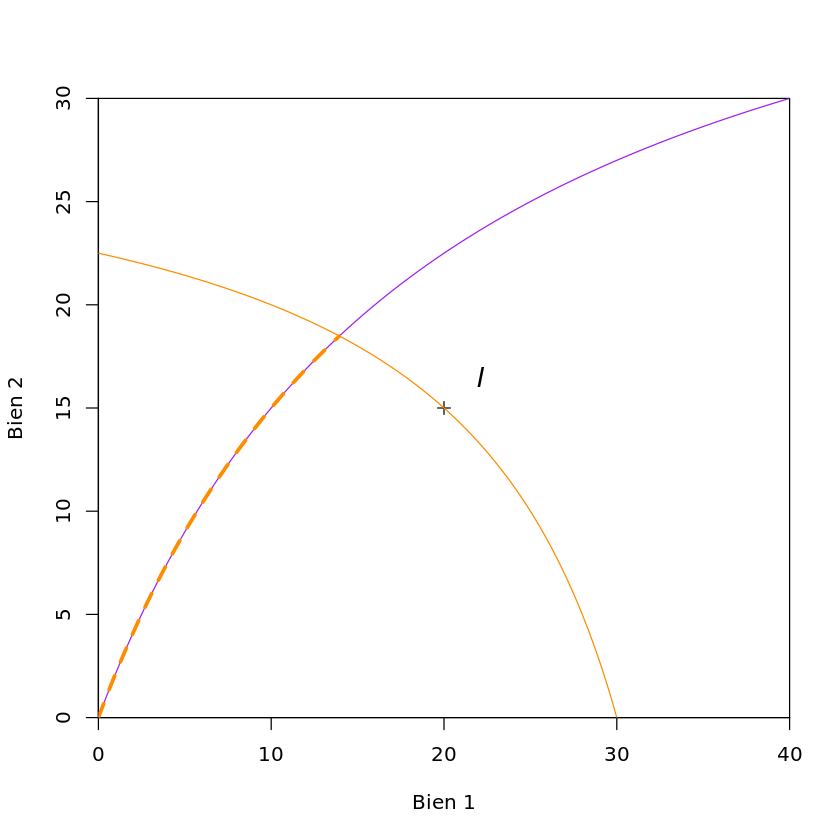

In [10]:
XB <- x1[UB(omega1 - x1, omega2 - optima(x1)) > UB(omega1 - I[1], omega2 - I[2])]

# Allocations acceptées par B

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                  # point I
    text(I[1]+.05*omega1, I[2]+.05*omega2, labels = "I", cex = 1.3, font = 3)
lines(x1, optima(x1), col = "purple", lwd = 1)                               # courbe des optima
lines(x1, rev(omega2 - indiffB(UB(omega1 - I[1], omega2 - I[2]))), col = "darkorange", ylim = c(0, omega2)) # CI B
lines(XB, optima(XB), col = "darkorange", lwd = 3, lty = 2)                  # allocations acceptées par B

Les allocations qui sont acceptées par **les deux** agents sont dont les allocations optimales se situant **entre** leurs deux courbes d'indifférence passant par $I$ : c'est le _coeur de l'économie_.

Je représente le coeur de l'économie ici en trait noir.

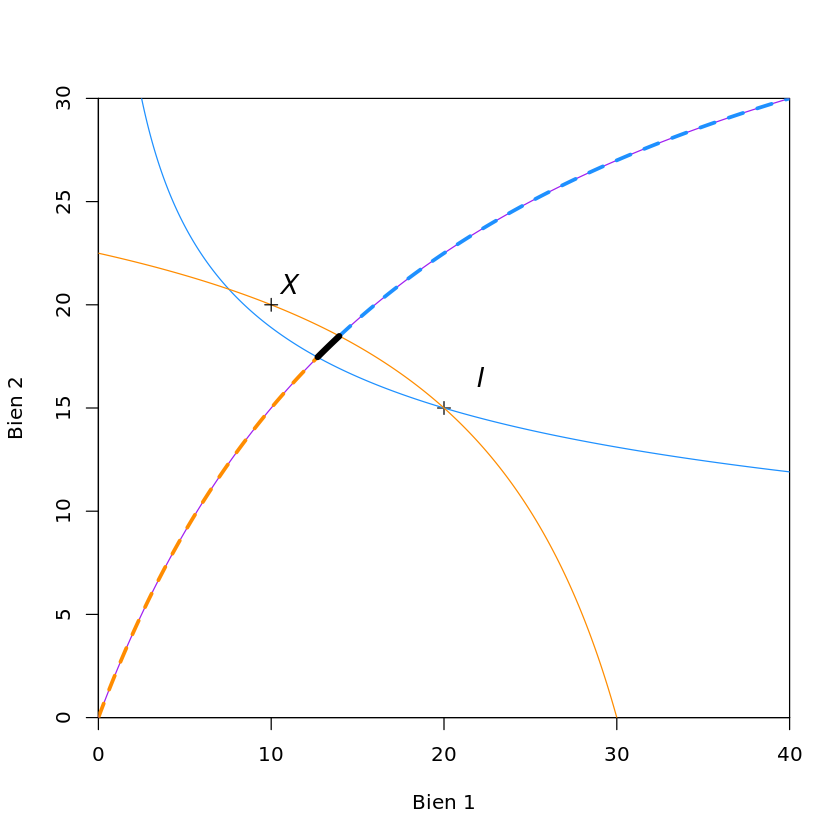

In [12]:
# Allocations acceptées par A

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                  # point I
    text(I[1]+.05*omega1, I[2]+.05*omega2, labels = "I", cex = 1.3, font = 3)
lines(x1, optima(x1), col = "purple", lwd = 1)                               # courbe des optima
lines(x1, indiffA(UA(I[1], I[2])), col = "dodgerblue", ylim = c(0, omega2))  # courbe d'indifférence de A
lines(XA, optima(XA), col = "dodgerblue", lwd = 3, lty = 2)                  # allocations acceptées par A

# Allocations acceptées par B

lines(x1, rev(omega2 - indiffB(UB(omega1 - I[1], omega2 - I[2]))), col = "darkorange", ylim = c(0, omega2)) # CI B
lines(XB, optima(XB), col = "darkorange", lwd = 3, lty = 2)                  # allocations acceptées par B

# Allocations acceptées par A et B
XAB <- intersect(XA, XB)
lines(XAB, optima(XAB), col = "black", lwd = 5)

# Allocation X

X <- c(10, 20)     # changez sa valeur pour voir quelles allocations seront acceptées

points(X[1], X[2], pch = 3)
text(X[1]+1, X[2]+1, labels = "X", cex = 1.3, font = 3)

On remarque alors que l'allocation $X = (10, 20; 30, 10)$ n'est acceptée par aucun des agents puisqu'elle n'est pas optimale. 